## 🔧 Step 1: Importing Required Libraries

Before diving into the dataset, let's bring in all the necessary libraries for data analysis, visualization, and machine learning. We’ll mainly use pandas for data wrangling, seaborn and matplotlib for visualization, and scikit-learn for modeling.


In [2]:
# Let's bring in the tools we need for data handling, visualization, and modeling.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## 📄 Step 2: Loading the Dataset

Now that our tools are ready, let’s load the insurance dataset and take a quick look to understand what kind of information we’re dealing with.


In [3]:
# Loading my dataset
data = pd.read_csv("/content/drive/MyDrive/insurance.csv")

# Let's take a quick peek at the first few rows
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 🔍 Step 3: Initial Data Overview

Let’s check out the structure of our data — column types, missing values, and some summary statistics. This helps us understand the overall health of the dataset.


In [4]:
# Check for null values and basic info
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 📊 Step 4: Exploratory Data Analysis (EDA)

This is where we explore the dataset visually to understand patterns and relationships.

- We look at how insurance charges are distributed.
- We check how age and smoking habits affect charges.
- We compare average costs by region.
- And we analyze correlations between numerical features like age, BMI, and charges.

These visuals help us gain real insights into the data before modeling!


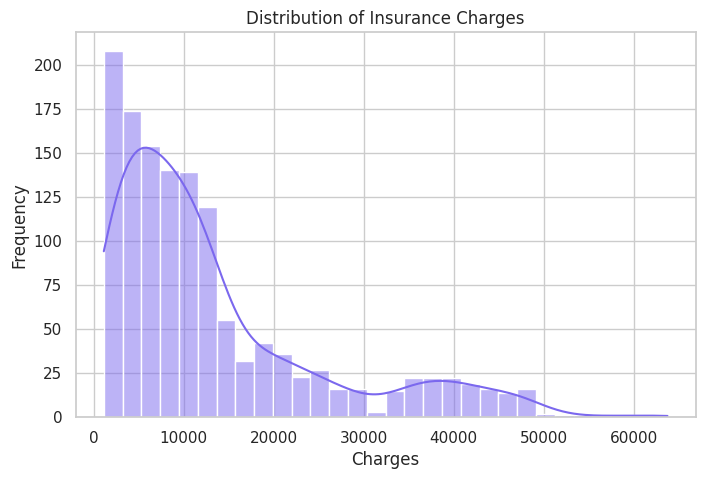

In [5]:
# Set plot style
sns.set(style="whitegrid")

# Distribution of charges
plt.figure(figsize=(8,5))
sns.histplot(data['charges'], kde=True, color='mediumslateblue')
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

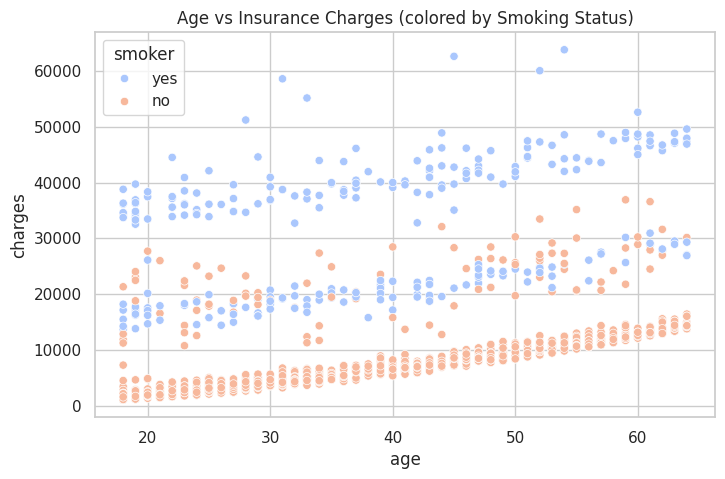

In [6]:
# Charges vs Age
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='charges', hue='smoker', data=data, palette='coolwarm')
plt.title('Age vs Insurance Charges (colored by Smoking Status)')
plt.show()

/tmp/ipython-input-7-1672565812.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='charges', data=data, palette='pastel')


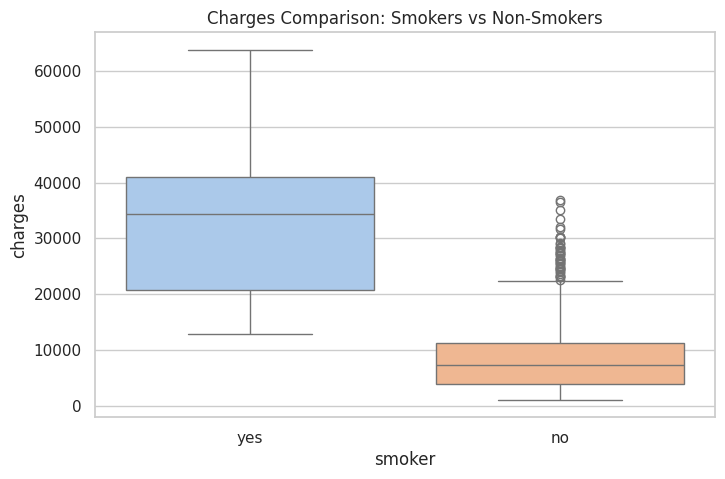

In [7]:
# Boxplot by smoker
plt.figure(figsize=(8,5))
sns.boxplot(x='smoker', y='charges', data=data, palette='pastel')
plt.title('Charges Comparison: Smokers vs Non-Smokers')
plt.show()

/tmp/ipython-input-8-2051642923.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='charges', data=data, palette='viridis')


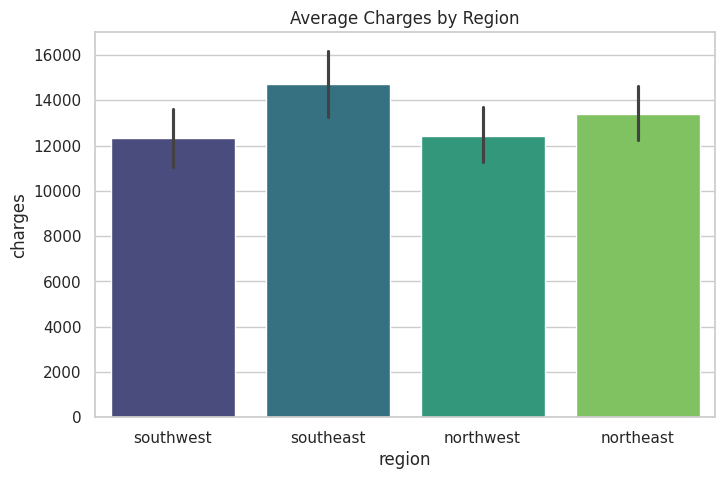

In [8]:
# Average charges per region
plt.figure(figsize=(8,5))
sns.barplot(x='region', y='charges', data=data, palette='viridis')
plt.title('Average Charges by Region')
plt.show()

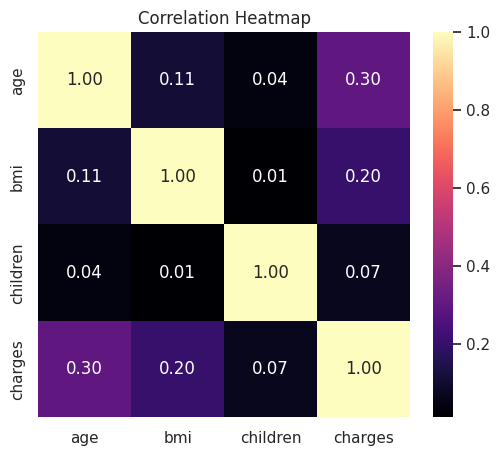

In [9]:
# Correlation heatmap
plt.figure(figsize=(6,5))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='magma', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## 🧮 Step 5: Encoding Categorical Data

Machine learning models work best with numbers, not text — so we convert categories like "sex", "region", and "smoker" into numeric values using one-hot encoding.


In [10]:
# Convert categorical variables to numeric using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

# Preview encoded data
data_encoded.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


## ✂️ Step 6: Splitting the Dataset

Now, we divide our dataset into a training set (80%) and a test set (20%). This helps us build the model on one part and test it on unseen data to evaluate performance.


In [11]:
# Define features and target
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

# 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 🧠 Step 7: Training the Linear Regression Model

Now it’s time to train our linear regression model using the training data. This model will try to learn the relationship between inputs like age, BMI, and charges.


In [12]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## 🧾 Step 8: Evaluating Model Performance

After training, we use the test set to evaluate how well our model performs. We use the following metrics:

- **MAE**: Average error in the prediction.
- **RMSE**: How spread out the errors are.
- **R² Score**: How much variance in the charges our model can explain.

The closer the R² score is to 1, the better!


In [13]:
# Predict on test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 4181.19
Mean Squared Error (MSE): 33596915.85
Root Mean Squared Error (RMSE): 5796.28
R² Score: 0.7836


## 💾 Step 9: Saving the Trained Model

Once we have a trained model, we can save it for future use instead of training it again. We'll use `joblib` to export it as a `.pkl` file.


In [14]:
import joblib

# Save the model to a file
joblib.dump(model, 'insurance_model.pkl')


['insurance_model.pkl']

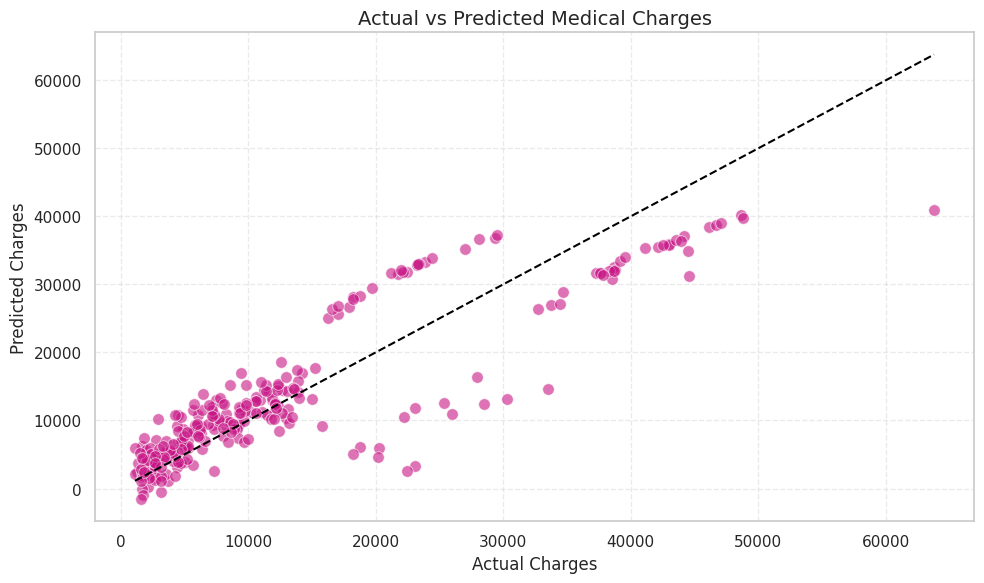

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# y_test and y_pred from model already
comparison_df = pd.DataFrame({'Actual Charges': y_test, 'Predicted Charges': y_pred})

# Plot: Actual vs Predicted scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Charges', y='Predicted Charges', data=comparison_df, color='mediumvioletred', s=70, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.title('Actual vs Predicted Medical Charges', fontsize=14)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()
